This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)


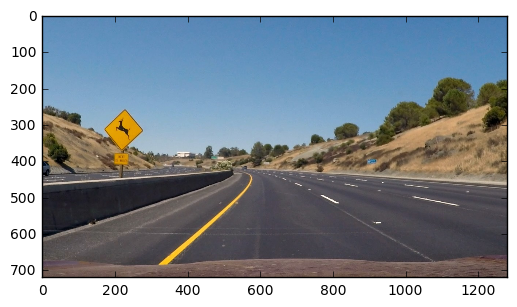

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import numpy as np
import cv2
from IPython.display import clear_output

path = '/Users/enterprise/Dev/Git/CarND-Advanced-Lane-Lines/test_images/test2.jpg'
img = mpimg.imread(path)
plt.imshow(img)
#printing out some stats and plotting
print('This image is:', type(img), 'with dimesions:', img.shape)

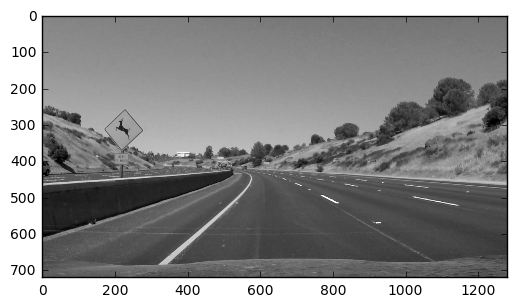

In [10]:
# grayscale conversion
gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
plt.imshow(gray,cmap='gray')

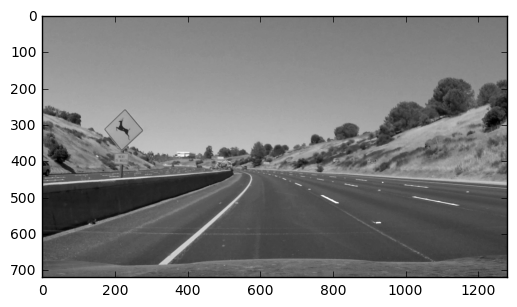

In [11]:
# Define a kernel size for Gaussian smoothing / blurring
# Note: this step is optional as cv2.Canny() applies a 5x5 Gaussian internally
kernel_size = 5
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size), 0)
plt.imshow(blur_gray, cmap='gray')

uint8
(720, 1280)


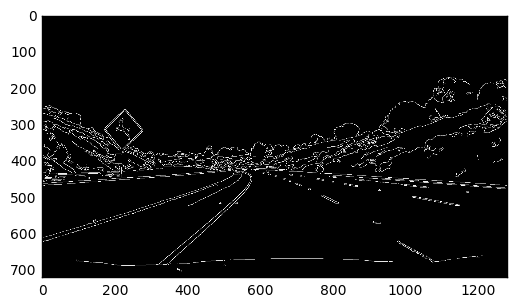

In [12]:
# Define parameters for Canny and run it
# NOTE: if you try running this code you might want to change these!
low_threshold = 1
high_threshold = 150
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

# Display the image
plt.imshow(edges, cmap='Greys_r')
print(edges.dtype)
print(edges.shape)

(720, 1280)


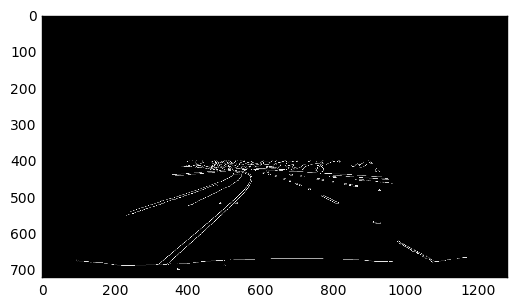

In [13]:
#masking

mask = np.zeros_like(edges)
ignore_mask_color = 255
vertices = np.array([[60,700],[400,400],[900,400],[1200,700]],dtype=np.int32)
cv2.fillPoly(mask,[vertices],ignore_mask_color)
masked_edges = cv2.bitwise_and(edges,mask)

print(masked_edges.shape)
plt.imshow(masked_edges, cmap='Greys_r')

number of lines are 5
(5, 1, 4)


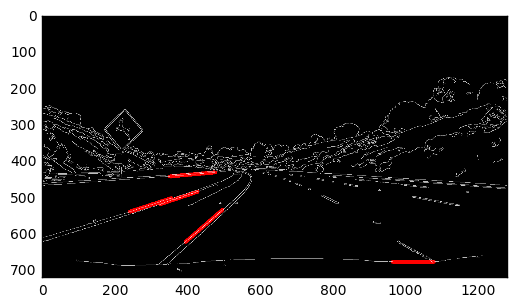

In [14]:
rho = 1 # distance resolution in pixels of the Hough grid
theta = 1*np.pi/180 # angular resolution in radians of the Hough grid
threshold = 10     # minimum number of votes (intersections in Hough grid cell)
min_line_length = 100 #minimum number of pixels making up a line
max_line_gap = 3    # maximum gap in pixels between connectable line segments
line_image = np.copy(img)*0 # creating a blank to draw lines on

# Run Hough on edge detected image
lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]),
                            min_line_length, max_line_gap)
print('number of lines are %d' % len(lines))
print(lines.shape)

for line in lines:
    for x1,y1,x2,y2 in line:
        #print(x1,y1,x2,y2)
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)

# Create a "color" binary image to combine with line image
color_edges = np.dstack((edges, edges, edges)) 

# Draw the lines on the edge image
combo = cv2.addWeighted(color_edges, 0.8, line_image, 1, 0) 
plt.imshow(combo)